In [1]:
#CNN 뇌종양 분류 모형
import os
import cv2
import tensorflow as tf
import numpy  as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = 'c:/workspace/Data/intel_image_classification/seg_train/seg_train'
test_dir = 'c:/workspace/Data/intel_image_classification/seg_test/seg_test'

train_data_gen = ImageDataGenerator(rescale = 1/255.)
test_data_gen = ImageDataGenerator(rescale = 1/255.)

train_data = train_data_gen.flow_from_directory(train_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')
val_data = test_data_gen.flow_from_directory(test_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

images, labels = train_data.next()
len(images), len(labels), images[0].shape

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


(32, 32, (224, 224, 3))

In [3]:
images1, labels1 = val_data.next()
len(images1), len(labels1), images1[0].shape

(32, 32, (224, 224, 3))

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential, Input

model = Sequential([
    Input(shape = images[0].shape),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax'),    
])

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 128)               1

In [5]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr = 0.00001)
classifier = model.fit(train_data, validation_data=val_data, batch_size=64, verbose=1, epochs=2, callbacks=[reduce_lr])

model.evaluate(val_data)

Epoch 1/2
439/439 [==============================] - 86s 182ms/step - loss: 1.0650 - accuracy: 0.6157 - val_loss: 0.7927 - val_accuracy: 0.7187 - lr: 0.0010
Epoch 2/2
94/94 [==============================] - 4s 45ms/step - loss: 0.6830 - accuracy: 0.7583


[0.6829674243927002, 0.7583333253860474]

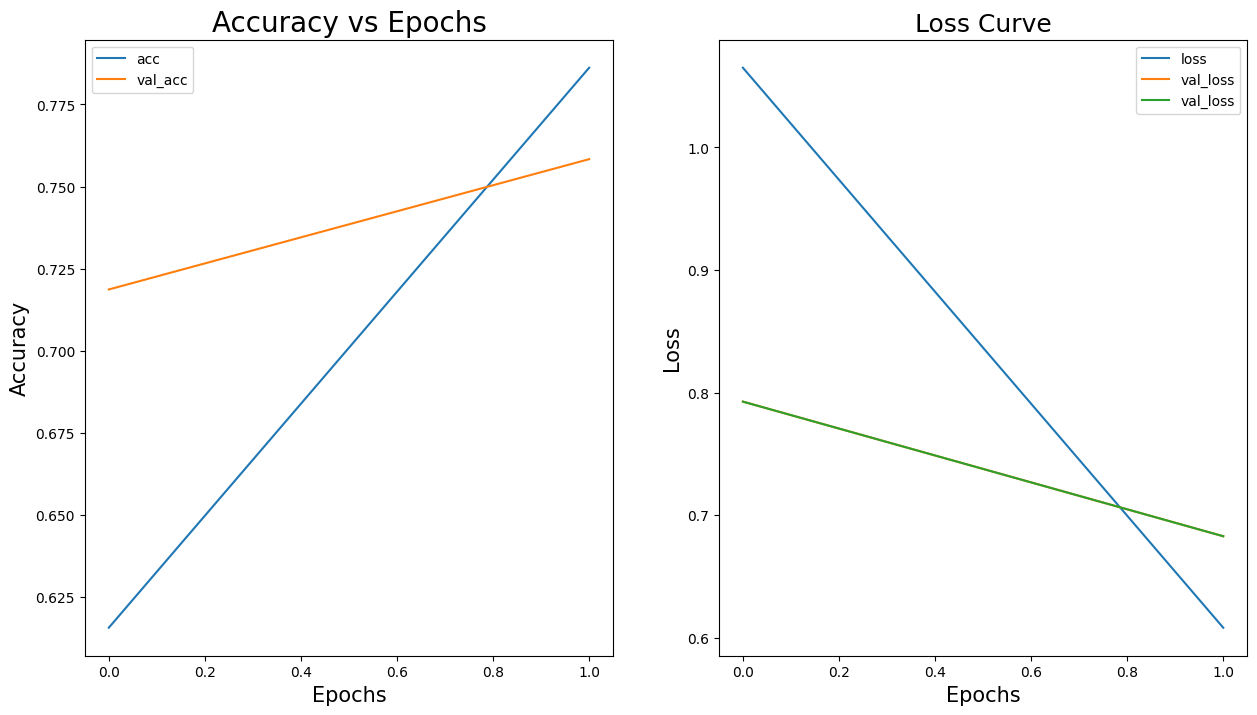

In [6]:
def model_performance_graphs():
    fig, axes = plt.subplots(1,2,figsize=(15,8))
    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label='acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label='val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize=20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label='loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label='val_loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()
    plt.show()

model_performance_graphs()

In [7]:
model.save('c:/workspace/Data/result/scene_model.h5')

In [8]:
from tensorflow.keras.models import load_model
loaded_model = load_model('c:/workspace/Data/result/scene_model.h5')

def preprocess_image(path):
    img = image.load_img(path, target_size=(224,224))    # 이미지 사이즈가 다 다르므로 정형화시킴
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = img_array / 255.0
    return img_preprocessed

In [10]:
img_path = 'c:/workspace/Data/intel_image_classification/seg_test/seg_test/mountain/20327.jpg'
img = preprocess_image(img_path)
prediction = loaded_model.predict(img)
predicted_class_index = np.argmax(prediction)

class_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 316ms/step
Predicted class: mountain
